# Rozdział 15. Uczenie maszynowe

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns
sns.set(style="whitegrid")

# Wbudowane zestawy danych

In [5]:
datasets.load_boston

<function sklearn.datasets._base.load_boston(*, return_X_y=False)>

In [6]:
datasets.fetch_california_housing

<function sklearn.datasets._california_housing.fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)>

In [7]:
datasets.make_regression

<function sklearn.datasets._samples_generator.make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)>

# Regresja

In [8]:
np.random.seed(123)

In [9]:
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10) #, noise=2.5)

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, train_size=0.5)

In [11]:
X_train.shape, y_train.shape

((25, 50), (25,))

In [12]:
X_test.shape, y_test.shape

((25, 50), (25,))

In [13]:
model = linear_model.LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
def sse(resid):
    return sum(resid**2)

In [16]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

9.518963662248488e-25

In [17]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_train)
sse_test

9.518963662248488e-25

In [18]:
model.score(X_train, y_train)

1.0

In [19]:
model.score(X_test, y_test)

0.3140740067520176

In [20]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("Numer próbki")
    axes[0].set_ylabel("Reszta")
    axes[0].set_title("Zbiór uczący")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("Numer próbki")
    axes[1].set_ylabel("Reszta")
    axes[1].set_title("Zbiór testowy")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("Numer współczynnika")
    axes[2].set_ylabel("Wartość współczynnika")
    fig.tight_layout()
    return fig, axes

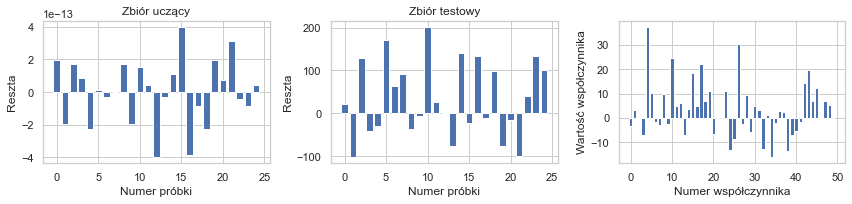

In [21]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-ols.pdf")

In [22]:
model = linear_model.Ridge() #alpha=2.5)

In [23]:
model.fit(X_train, y_train)

Ridge()

In [24]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

178.50695164950858

In [25]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

212737.0016010584

In [26]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9994595515017335, 0.31670332736075446)

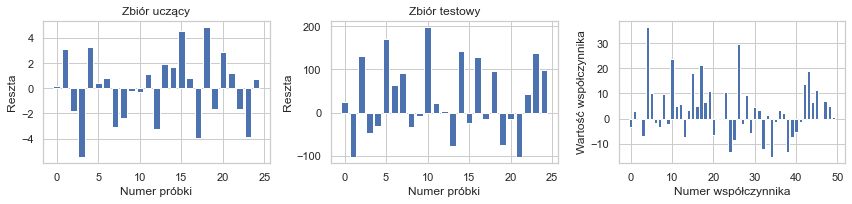

In [27]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-ridge.pdf")

In [28]:
model = linear_model.Lasso(alpha=1.0)

In [29]:
model.fit(X_train, y_train)

Lasso()

In [30]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

309.7497138953233

In [31]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

1489.117606500263

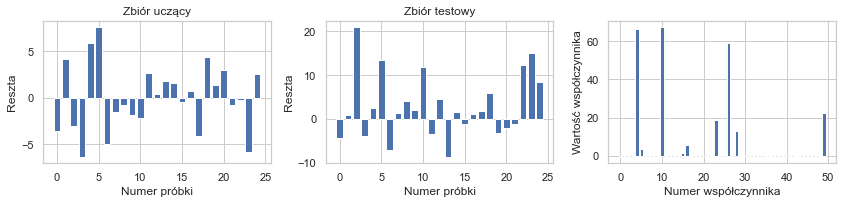

In [32]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-lasso.pdf")

In [33]:
alphas = np.logspace(-4, 2, 100)

In [34]:
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    resid = y_train - model.predict(X_train)
    sse_train[n] = sum(resid**2)
    resid = y_test - model.predict(X_test)
    sse_test[n] = sum(resid**2)

/Users/filip/miniconda3/envs/py3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.11475067343923, tolerance: 33.02941024391199
  model = cd_fast.enet_coordinate_descent(
/Users/filip/miniconda3/envs/py3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.82233955030587, tolerance: 33.02941024391199
  model = cd_fast.enet_coordinate_descent(
/Users/filip/miniconda3/envs/py3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.204461099971375, tolerance: 33.02941024391199
  model = cd_fast.enet_coordinate_descent(
/Users/filip/miniconda3/envs/py3.8/lib/python3.8

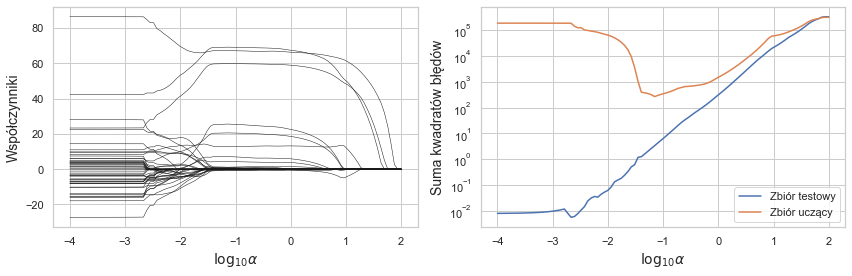

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="Zbiór testowy")
axes[1].semilogy(np.log10(alphas), sse_test, label="Zbiór uczący")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=14)
axes[0].set_ylabel(r"Współczynniki", fontsize=14)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=14)
axes[1].set_ylabel(r"Suma kwadratów błędów", fontsize=14)
fig.tight_layout()
fig.savefig("ch15-regression-lasso-vs-alpha.pdf")

In [36]:
model = linear_model.LassoCV()

In [37]:
model.fit(X_all, y_all)

LassoCV()

In [38]:
model.alpha_

0.06559238747534718

In [39]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

1.5450589323148352

In [40]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

1.5321417406216176

In [41]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9999953221722068, 0.9999950788657098)

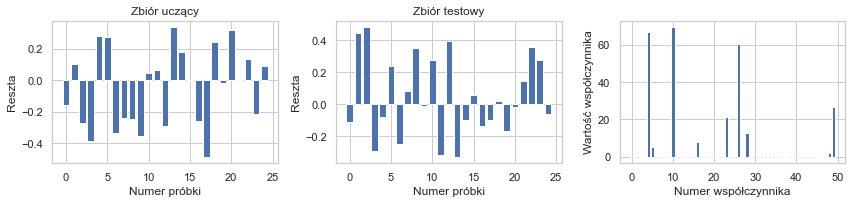

In [42]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-lasso-cv.pdf")

In [43]:
model = linear_model.ElasticNetCV()

In [44]:
model.fit(X_all, y_all)

ElasticNetCV()

In [45]:
model.alpha_

0.13118477495069436

In [46]:
model.l1_ratio

0.5

In [47]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

2183.839172939129

In [48]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

2650.050446338245

In [49]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9933881981034111, 0.9914882195448783)

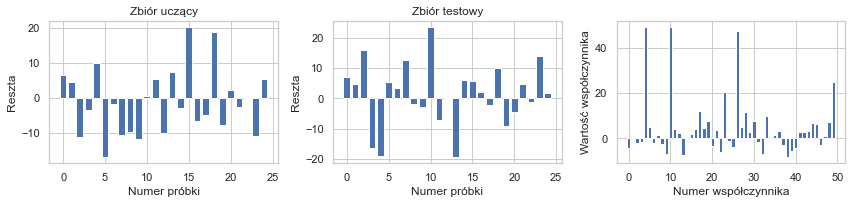

In [50]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-elastic-net-cv.pdf")

# Klasyfikacja

In [51]:
iris = datasets.load_iris()

In [52]:
type(iris)
np.random.seed(123)

In [53]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [54]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
iris.data.shape

(150, 4)

In [56]:
iris.target.shape

(150,)

In [57]:
# print(iris['DESCR'])

In [58]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, train_size=0.7)

In [59]:
classifier = linear_model.LogisticRegression(solver='liblinear')

In [60]:
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [61]:
y_test_pred = classifier.predict(X_test)

In [62]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [63]:
np.bincount(y_test)

array([18, 10, 17])

In [64]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 16]])

In [65]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  3, 14]])

In [66]:
classifier = neighbors.KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 17]])

In [67]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  4, 13]])

In [68]:
classifier = ensemble.RandomForestClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 15]])

In [69]:
train_size_vec = np.linspace(0.1, 0.9, 30)

In [70]:
classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier
              ]

In [71]:
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)

In [72]:
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(iris.data, iris.target, train_size=train_size)

    for m, Classifier in enumerate(classifiers): 
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_pred = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_pred).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

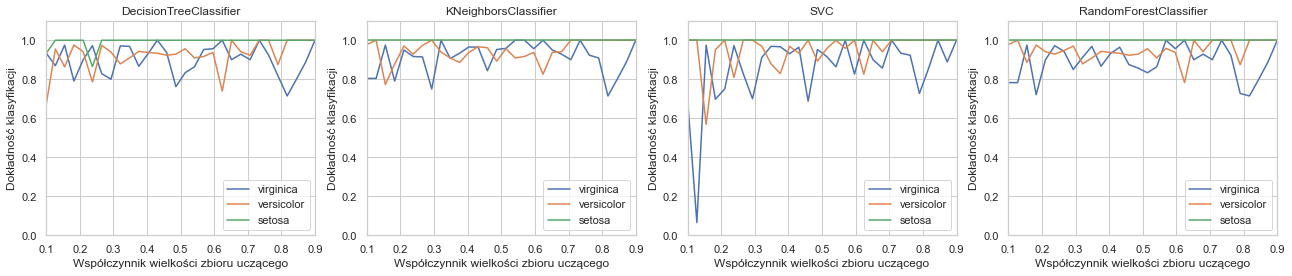

In [73]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(18, 4))

for m, Classifier in enumerate(classifiers): 
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_xlim(0.1, 0.9)
    axes[m].set_ylabel("Dokładność klasyfikacji")
    axes[m].set_xlabel("Współczynnik wielkości zbioru uczącego")
    axes[m].legend(loc=4)

fig.tight_layout()
fig.savefig("ch15-classification-comparison.pdf")

# Klasteryzacja

In [74]:
X, y = iris.data, iris.target

In [75]:
np.random.seed(123)

In [76]:
n_clusters = 3

In [77]:
c = cluster.KMeans(n_clusters=n_clusters)

In [78]:
c.fit(X)

KMeans(n_clusters=3)

In [79]:
y_pred = c.predict(X)

In [80]:
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [81]:
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [82]:
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))

In [83]:
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1

In [84]:
y_pred[::8]

array([2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [85]:
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [86]:
metrics.confusion_matrix(y, y_pred)

array([[ 0,  0, 50],
       [ 2, 48,  0],
       [36, 14,  0]])

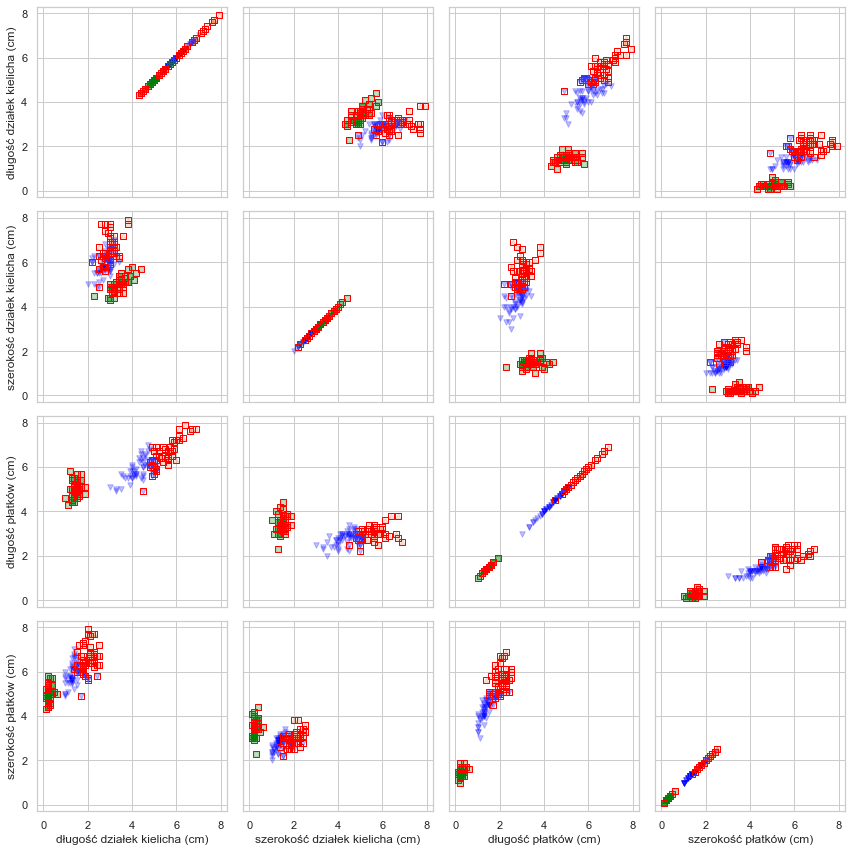

In [87]:
N = X.shape[1]

fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)

colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask],
                               marker=markers[p], s=30, 
                               color=colors[p], alpha=0.25)

        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n],
                               marker="s", s=30, 
                               edgecolor="red", 
                               facecolor=(1,1,1,0))
            
    feature_names=['długość działek kielicha (cm)','szerokość działek kielicha (cm)','długość płatków (cm)','szerokość płatków (cm)']        
    axes[N-1, m].set_xlabel(feature_names[m], fontsize=12)
    axes[m, 0].set_ylabel(feature_names[m], fontsize=12)
fig.tight_layout()
fig.savefig("ch15-clustering.pdf")